# Chart Busters Participants Prediction

<img src="./images/Music.jpg" height='400px' width='100%'><br/>





## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Importing Packages](#section2)<br>
3. [Loading Data](#section3)<br>
  - 3.1 [Description of the Datasets](#section301)<br>
  - 3.2 [Pandas Profiling before Data Preprocessing](#section302)<br>
4. [Data Preprocessing](#section4)<br>
  - 4.1 [Filling missing values](#section401)<br>
  - 4.2 [Remove highly correlated columns](#section402)<br>
  - 4.3 [Handling Outliers](#section403)<br>
  - 4.4 [Pandas Profiling after Data Preprocessing](#section404)<br>
  - 4.5 [Exploratory Data Analysis](#section405)<br>
5. [Data preparation for model building](#section5)<br>
  - 5.1 [Dummification / One-Hot Encoding](#section501)<br>
  - 5.2 [Standardizing continuos independent variables](#section502)<br>
  - 5.3 [Segregating Train and Test data](#section503)<br>
6. [Ensemble Modelling and Prediction](#section6)<br>  
  - 6.1 [Linear Regression](#section601)
      - 6.1.1 [Checking assumptions of Linear Regression](#section60101)
      - 6.1.2 [Using Default Model](#section60102)
          - 6.1.2.1 [Building Model and Predictionl](#section6010201)
          - 6.1.2.2 [Model Evaluation](#section6010202)
      - 6.1.3 [Using GridSearchCV](#section60103)
          - 6.1.2.1 [Building Model and Predictionl](#section6010301)
          - 6.1.2.2 [Model Evaluation](#section6010301)
       - 6.1.4 [Using RandomSearchCV](#section60104)
          - 6.1.2.1 [Building Model and Predictionl](#section6010401)
          - 6.1.2.2 [Model Evaluation](#section6010401)
  - 6.2 [Decision Tree](#section602)
      - 6.2.1 [Using Default Model](#section60201)
          - 6.2.1.1 [Building Model and Predictionl](#section6020101)
          - 6.2.1.2 [Model Evaluation](#section6020102)
      - 6.2.2 [Using GridSearchCV](#section60202)
          - 6.2.2.1 [Building Model and Predictionl](#section6020201)
          - 6.2.2.2 [Model Evaluation](#section6020202)
      - 6.2.3 [Using RandomSearchCV](#section60203)
          - 6.2.3.1 [Building Model and Predictionl](#section6020301)
          - 6.2.3.2 [Model Evaluation](#section6020302)
  - 6.3 [Random Forest](#section603)
      - 6.3.1 [Using Default Model](#section60301)
          - 6.3.1.1 [Building Model and Predictionl](#section6030101)
          - 6.1.2.2 [Model Evaluation](#section6030102)
      - 6.3.2 [Using GridSearchCV](#section60302)
          - 6.3.2.1 [Building Model and Predictionl](#section6030201)
          - 6.3.2.2 [Model Evaluation](#section6030202)
      - 6.3.3 [Using RandomSearchCV](#section60303)
          - 6.3.3.1 [Building Model and Predictionl](#section6030301)
          - 6.3.3.2 [Model Evaluation](#section6030302)
7.  [Conclusion](#section7)<br>

<a id=section1></a>
# 1. Problem Statement

<img src="./images/ProblemStatement.jpg" height='400px' width='100%'><br/>

<a id=section2></a>
# 2. Importing Packages

In [243]:
import numpy as np                     

import pandas as pd

# To suppress pandas warnings.
pd.set_option('mode.chained_assignment', None) 

# To display all the data in each column
pd.set_option('display.max_colwidth', -1)         

pd.get_option("display.max_rows",10000)

# To display every column of the dataset in head()
pd.options.display.max_columns = 100               

import warnings
warnings.filterwarnings('ignore')     

In [244]:
import matplotlib.pyplot as plt
%matplotlib inline

# To apply seaborn styles to the plots.
import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      

<a id=section3></a>

# 3. Loading Data

In [245]:
# loading data from csv file to a data frame
df_train = pd.read_csv('./data/Data_Train.csv', index_col = "Unique_ID")

# Adding new column 'isTestData' so that we can easily separate train and test 
# data during prediction process
df_train['Is_Test_Data'] = 0

df_test = pd.read_csv('./data/Data_Test.csv', index_col = "Unique_ID")

df_test['Is_Test_Data'] = 1

# concat train and test data for data pre processing
df_views_songs = pd.concat([df_train,df_test])

df_views_songs.head()

,Comments,Country,Followers,Genre,Is_Test_Data,Likes,Name,Popularity,Song_Name,Timestamp,Views
Unique_ID,,,,,,,,,,,
413890,4,AU,119563,danceedm,0,499,Hardstyle,97,N-Vitral presents BOMBSQUAD - Poison Spitter (Snakepit 2018 Anthem),2018-03-30 15:24:45.000000,14017.0
249453,17,AU,2141,danceedm,0,49,Dj Aladdin,17,Dj Aladdin - Old School Hip Hop Quick Mix,2016-06-20 05:58:52.000000,1918.0
681116,11,AU,22248,danceedm,0,312,Maxximize On Air,91,Maxximize On Air - Mixed by Blasterjaxx - Episode #048,2015-05-08 17:45:59.000000,9668.0
387253,2,AU,393655,rbsoul,0,"2,400",GR6 EXPLODE,76,MC Yago - Tenho Compromisso (DJ R7),2017-06-08 23:50:03.000000,113036.0
1428029,81,AU,201030,danceedm,0,"3,031",Tritonal,699,Escape (feat. Steph Jones),2016-09-17 20:50:19.000000,110024.0


<a id=section301></a>
## 3.1 Description of the Datasets

#### a. Check shape

In [246]:
#shape of data
df_views_songs.shape

(98073, 11)

#### b. info
<img src="./images/Features.jpg" height='400px' width='100%'><br/>

In [247]:
df_views_songs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98073 entries, 413890 to 415046
Data columns (total 11 columns):
Comments        98073 non-null int64
Country         98073 non-null object
Followers       98073 non-null int64
Genre           98073 non-null object
Is_Test_Data    98073 non-null int64
Likes           98073 non-null object
Name            98073 non-null object
Popularity      98073 non-null object
Song_Name       98072 non-null object
Timestamp       98073 non-null object
Views           78458 non-null float64
dtypes: float64(1), int64(3), object(7)
memory usage: 9.0+ MB


**Observations :**  
We don't have any missing values

#### c. describe

In [248]:
df_views_songs.describe()

,Comments,Followers,Is_Test_Data,Views
count,98073.000000,9.807300e+04,98073.000000,7.845800e+04
mean,115.987591,4.796740e+05,0.200004,5.469686e+05
std,756.416793,1.168391e+06,0.400005,3.883085e+06
min,0.000000,1.000000e+00,0.000000,0.000000e+00
25%,1.000000,1.778400e+04,0.000000,6.216500e+03
50%,12.000000,8.892700e+04,0.000000,2.538650e+04
75%,61.000000,3.936550e+05,0.000000,1.201342e+05
max,104082.000000,9.789123e+06,1.000000,1.994050e+08


**Observations :** Looks like there are some outliers. Lets confirm same from pandas profiling in next step.

 <a id=section302></a>
## 3.2 Pandas Profiling before Data Preprocessing

In [249]:
# To install pandas profiling please run this command.

#!pip install pandas-profiling --upgrade

In [250]:
#import pandas_profiling

# Running pandas profiling to get better understanding of data
#df_views_songs.profile_report(title='Pandas Profiling before Data Preprocessing', style={'full_width':True})

 <a id=section4></a>
# 4. Data Preprocessing

 <a id=section401></a>
## 4.1 Fixing datatypes of columns

#### a. Country column has only one value

In [251]:
df_views_songs['Country'].value_counts()

AU    98073
Name: Country, dtype: int64

**NOTE :** We can observe country has only one value i.e AU. Let's drop it.

In [252]:
df_views_songs.drop('Country', axis=1, inplace=True)

#### b. Change Likes column from string to integer

In [253]:
# replacing  , M K with empty string
df_views_songs['Likes'] = df_views_songs['Likes'].str.replace(',', '')
df_views_songs['Likes'] = df_views_songs['Likes'].str.replace('K', '')
df_views_songs['Likes'] = df_views_songs['Likes'].str.replace('M', '')

#converting string to float and then int
df_views_songs['Likes'] = df_views_songs['Likes'].astype('float64').astype('int64')

#### c. Change Popularity column from string to integer

In [254]:
#converting string to int
df_views_songs['Popularity'] = df_views_songs['Likes'].astype('int64')

#### d. Change Timestamp column to pandas datetime

In [255]:
df_views_songs
df_views_songs['Timestamp'] = pd.to_datetime(df_views_songs['Timestamp'])

In [256]:
df_views_songs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98073 entries, 413890 to 415046
Data columns (total 10 columns):
Comments        98073 non-null int64
Followers       98073 non-null int64
Genre           98073 non-null object
Is_Test_Data    98073 non-null int64
Likes           98073 non-null int64
Name            98073 non-null object
Popularity      98073 non-null int64
Song_Name       98072 non-null object
Timestamp       98073 non-null datetime64[ns]
Views           78458 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 8.2+ MB


 <a id=section402></a>
## 4.2 Filling missing values

In [257]:
column_names = list(df_views_songs.columns)
column_names.remove('Views')

In [258]:
columns_to_be_dropped = list()
for i in range(0,len(column_names)):
  if(df_views_songs[column_names[i]].isna().any()):
    
    # calculating missing percentage for each column
    missing_count = sum(df_views_songs[column_names[i]].isna())
    total_count = len(df_views_songs[column_names[i]])
    missing_percent = (missing_count/total_count)*100
  

    # add column name to `columns_to_be_dropped` 
    # if missing percentage is greater than 70
    if(missing_percent >= 70):
      columns_to_be_dropped.append(column_names[i])
    else:

      # checking datatype of each column so that we know 
      # which value to be replaced in missing value(median/mode)
      if(df_views_songs[column_names[i]].dtype == 'object'):
        value_to_be_filled = df_views_songs[column_names[i]].mode()[0]
        df_views_songs[column_names[i]].fillna(value_to_be_filled, inplace=True)
      elif(df_views_songs[column_names[i]].dtype == 'float64' or df_views_songs[column_names[i]].dtype == 'int64'):
         value_to_be_filled = df_views_songs[column_names[i]].median()
         df_views_songs[column_names[i]].fillna(value_to_be_filled, inplace=True)

# droping all columns who have more than 70% missing values
df_views_songs.drop(columns_to_be_dropped, axis=1, inplace=True)

In [259]:
df_views_songs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98073 entries, 413890 to 415046
Data columns (total 10 columns):
Comments        98073 non-null int64
Followers       98073 non-null int64
Genre           98073 non-null object
Is_Test_Data    98073 non-null int64
Likes           98073 non-null int64
Name            98073 non-null object
Popularity      98073 non-null int64
Song_Name       98073 non-null object
Timestamp       98073 non-null datetime64[ns]
Views           78458 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 8.2+ MB


**Observations:**

We don't have any missing values. Good to go.

 <a id=section403></a>
## 4.3 Remove highly correlated columns

In [260]:
# extracting feature columns
feature_cols = list(df_views_songs.columns)
feature_cols.remove('Views')
feature_cols.remove('Is_Test_Data')
feature_cols

['Comments',
 'Followers',
 'Genre',
 'Likes',
 'Name',
 'Popularity',
 'Song_Name',
 'Timestamp']

In [261]:
# extracting highly correlated columns(except target variable) to drop

# Create correlation matrix
corr_matrix = df_views_songs[feature_cols].corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.80
cols_to_drop = [column for column in upper.columns if any(upper[column] > 0.70)]
cols_to_drop

['Popularity']

**Observations :** We have two highly correlated independant columns. Let's drop one.

In [262]:
# lets drop Popularity
df_views_songs.drop('Popularity', axis=1, inplace=True)

 <a id=section404></a>
## 4.4 Handling Outliers

Concept of outliers is only applicable to continuous variables.

NOTE:

1. Remove ouliers if percentage is less than 2%

2. Fill remaining outliers values with median(continuous) or mode(categorical) depending on data.



In [263]:
# storing columns with continuos datatype in 'continuos_cols' 
continuous_columns = []
categorical_columns = []
cols = df_views_songs.columns

for i in range(0,len(cols)):
  if(df_views_songs[cols[i]].dtype != 'object'):
    continuous_columns.append(cols[i])
  else:
    categorical_columns.append(cols[i])

continuous_columns.remove('Timestamp')
continuous_columns.remove('Views')

print(continuous_columns)
print(categorical_columns)

['Comments', 'Followers', 'Is_Test_Data', 'Likes']
['Genre', 'Name', 'Song_Name']


In [264]:
for i in range(0, len(continuous_columns)):
  df_temp = df_views_songs[continuous_columns[i]]
  sorted(df_temp)
  q1, q3= np.percentile(df_temp,[10,95])
  iqr = q3 - q1
  lower_bound = q1 -(1.5 * iqr) 
  upper_bound = q3 +(1.5 * iqr) 
  true_index = df_temp.loc[(df_temp < lower_bound) & \
            (df_temp > upper_bound)].any()

  print(true_index)

False
False
False
False


**Observations:** We don't have any outliers in the data.

 <a id=section405></a>
## 4.5 Pandas Profiling after Data Preprocessing

 <a id=section406></a>
## 4.6 Exploratory Data Analysis

We do EDA to have little more understanding of data which might eventually help in selecting best model for prediction

### 1. Top 10 artists with most views

In [265]:
df_views_songs.groupby('Name')['Views'].sum().sort_values(ascending=False).head(10)

Name
LIL UZI VERT              1.527334e+09
XXXTENTACION              1.314233e+09
Kodak Black               1.152849e+09
Future                    1.141617e+09
☆LiL PEEP☆                8.639321e+08
$UICIDEBOY$               8.624110e+08
octobersveryown           8.605966e+08
A BOOGIE WIT DA HOODIE    8.372475e+08
Trippie Redd             8.366992e+08
Juice WRLD                6.213250e+08
Name: Views, dtype: float64

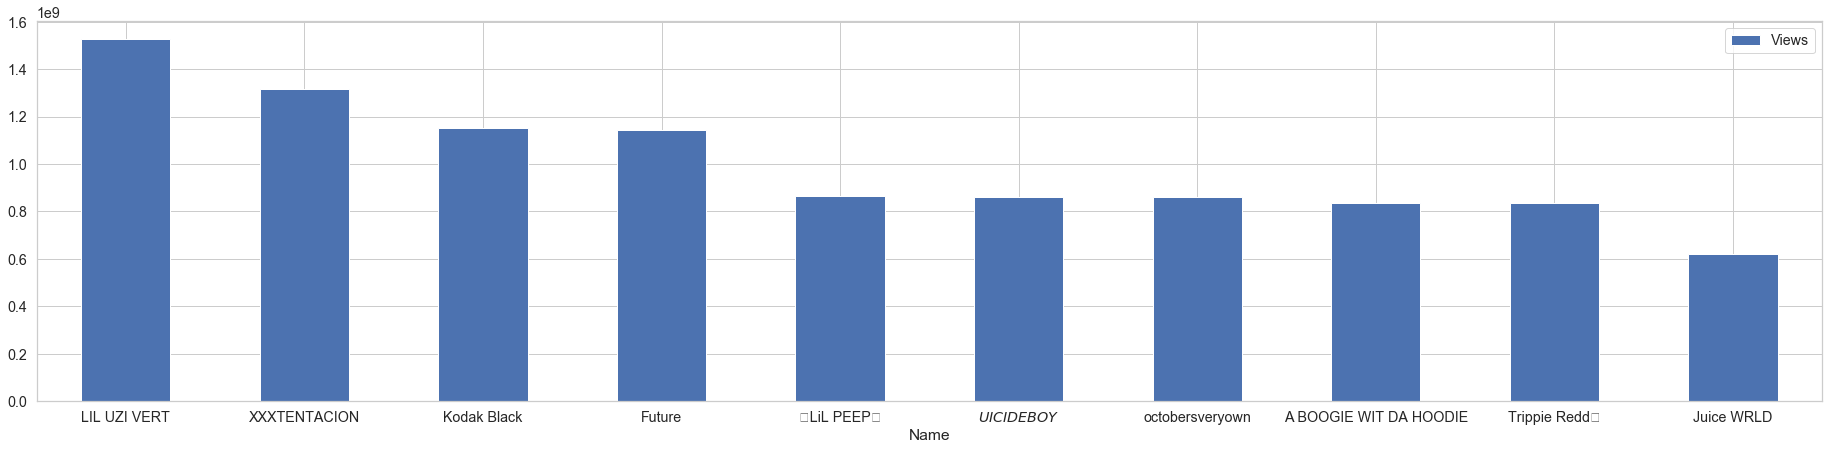

In [266]:
# plotting
df = pd.DataFrame(
	{
    'Views':df_views_songs.groupby('Name')['Views'].sum().sort_values(ascending=False).head(10)
	}
	) 
df.plot.bar(rot=0,figsize=(32, 7))

### 2. Top 10 songs with most views

In [267]:
df_views_songs.groupby('Song_Name')['Views'].sum().sort_values(ascending=False).head(10)

Song_Name
Major Lazer & DJ Snake - Lean On (feat. MØ)               199404980.0
1.5- XO TOUR Llif3 (Produced By TM88)                     195879594.0
Desiigner- "Panda" (Prod. By: Menace)                     183945499.0
Drake ~ Back To Back Freestyle                            163417253.0
rockstar (feat. 21 Savage)                                160900667.0
XXXTENTACION - Look At Me! (Prod. ROJAS & Jimmy Duval)    155167050.0
Lucid Dreams                                              142324998.0
All Of Me                                                 131454078.0
Gucci Gang                                                131053001.0
Drowning (feat. Kodak Black)                              129741188.0
Name: Views, dtype: float64

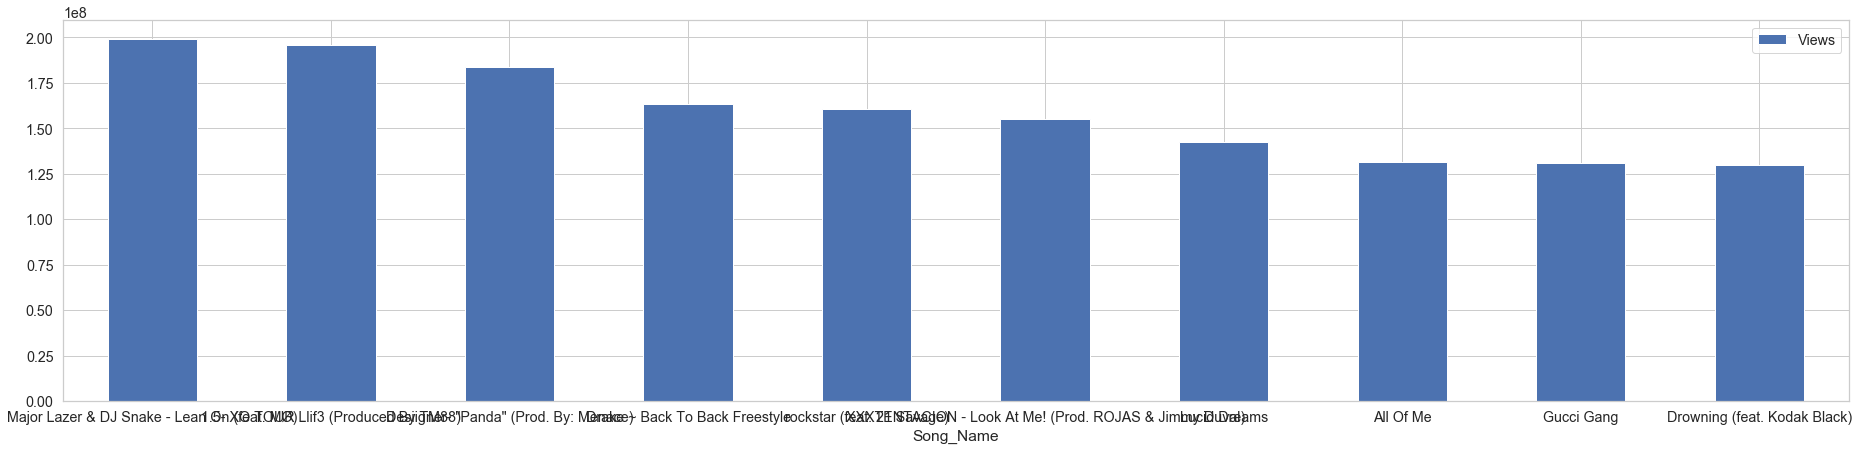

In [268]:
df = pd.DataFrame(
	{
    'Views':df_views_songs.groupby('Song_Name')['Views'].sum().sort_values(ascending=False).head(10)
	}
	) 
df.plot.bar(rot=0,figsize=(32, 7))

### 3. Top 10 genre with most views

In [269]:
df_views_songs.groupby('Genre')['Views'].sum().sort_values(ascending=False).head(10)

Genre
all-music     2.519053e+10
danceedm      6.036237e+09
rbsoul        3.297552e+09
electronic    3.183184e+09
trap          1.120763e+09
latin         1.078477e+09
pop           6.447727e+08
rock          5.300611e+08
ambient       3.375537e+08
classical     3.015770e+08
Name: Views, dtype: float64

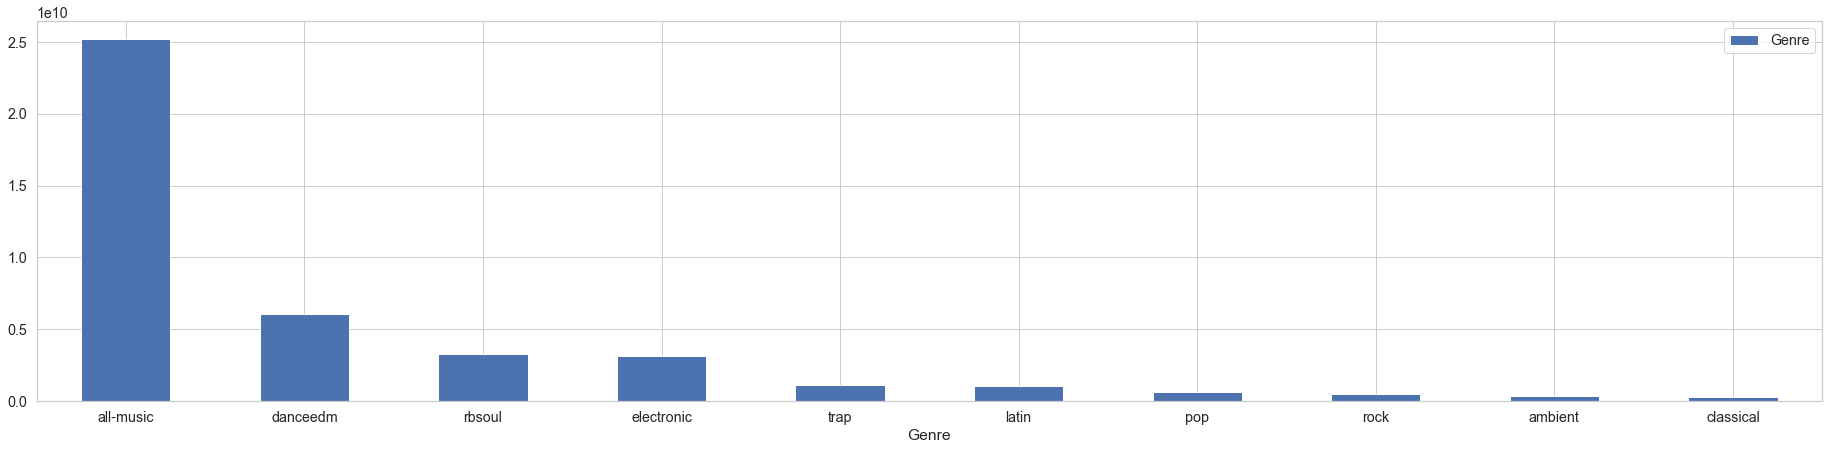

In [270]:
df = pd.DataFrame(
	{
    'Genre':df_views_songs.groupby('Genre')['Views'].sum().sort_values(ascending=False).head(10)
	}
	) 
df.plot.bar(rot=0,figsize=(32, 7))

In [271]:
df_views_songs.columns

Index(['Comments', 'Followers', 'Genre', 'Is_Test_Data', 'Likes', 'Name',
       'Song_Name', 'Timestamp', 'Views'],
      dtype='object')

 <a id=section5></a>
# 5. Data preparation for model building

 <a id=section501></a>
## 5.1 Dummification / One-Hot Encoding of categorical variables

In [272]:
# lets look at how many unique labels each category has
for i in range(0, len(categorical_columns)):
  print(categorical_columns[i], " - ", df_views_songs[categorical_columns[i]].nunique())

Genre  -  21
Name  -  1219
Song_Name  -  98072


**Observations:**
 
As we have lots of categories in one column,

Can we apply below thesis results?

http://proceedings.mlr.press/v7/niculescu09/niculescu09.pdf


**Summary:**

<img src="./images/one-hot-encoding.png" height='200px' width='100%'><br/>

In [273]:
for col in categorical_columns:
    imp_labels = list(df_views_songs[col].value_counts().head(10).index)
    
    for label in imp_labels:
        df_views_songs[col+'_'+label] = np.where(df_views_songs[col] == label, 1, 0)
    
    df_views_songs.drop(col, axis = 1, inplace=True)
    
df_views_songs.head()

,Comments,Followers,Is_Test_Data,Likes,Timestamp,Views,Genre_danceedm,Genre_electronic,Genre_all-music,Genre_rbsoul,Genre_latin,Genre_trap,Genre_rock,Genre_deephouse,Genre_pop,Genre_dubstep,Name_Mixmag,Name_Monstercat,Name_GR6 EXPLODE,Name_Hardstyle,Name_Sweet Musique,Name_officialb2s,Name_trndmsk,Name_Uptempo HC Channel,Name_Resident Advisor,Name_LEGENDA FUNK,Song_Name_! ARRIBA NUEVO LEON ! [ Norteño Quick Mix ] DROPS 2018,Song_Name_TimPaa - Crazy (Original Mix)[10k Free EP],Song_Name_CONRANK - Mad In Here [FREE DOWNLOAD],Song_Name_Turn Me On (JP Candela Remix),Song_Name_The Wrecking Ball Unchained,Song_Name_The Anjunadeep Edition 198 with Dosem,"Song_Name_OFB x UK Drill Type Beat ""Suppressed"" [Pt II] (Prod. ZCBeats x Ghosty)","Song_Name_For Hot 97 (feat. JBan$2Turn, Byou & BigBruthaChubba)",Song_Name_MOT THUA YEU NGUOI DJ PT,Song_Name_Breathe(Acoustic) - Lauv
Unique_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
413890,4,119563,0,499,2018-03-30 15:24:45,14017.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
249453,17,2141,0,49,2016-06-20 05:58:52,1918.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
681116,11,22248,0,312,2015-05-08 17:45:59,9668.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
387253,2,393655,0,2400,2017-06-08 23:50:03,113036.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1428029,81,201030,0,3031,2016-09-17 20:50:19,110024.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [274]:
print(df_views_songs.columns)
print(df_views_songs.shape )

Index(['Comments', 'Followers', 'Is_Test_Data', 'Likes', 'Timestamp', 'Views',
       'Genre_danceedm', 'Genre_electronic', 'Genre_all-music', 'Genre_rbsoul',
       'Genre_latin', 'Genre_trap', 'Genre_rock', 'Genre_deephouse',
       'Genre_pop', 'Genre_dubstep', 'Name_Mixmag', 'Name_Monstercat',
       'Name_GR6 EXPLODE', 'Name_Hardstyle', 'Name_Sweet Musique',
       'Name_officialb2s', 'Name_trndmsk', 'Name_Uptempo HC Channel',
       'Name_Resident Advisor', 'Name_LEGENDA FUNK',
       'Song_Name_! ARRIBA NUEVO LEON ! [ Norteño Quick Mix ] DROPS 2018',
       'Song_Name_TimPaa - Crazy (Original Mix)[10k Free EP]',
       'Song_Name_CONRANK - Mad In Here [FREE DOWNLOAD]',
       'Song_Name_Turn Me On (JP Candela Remix)',
       'Song_Name_The Wrecking Ball Unchained',
       'Song_Name_The Anjunadeep Edition 198 with Dosem',
       'Song_Name_OFB x UK Drill Type Beat "Suppressed" [Pt II] (Prod. ZCBeats x Ghosty)',
       'Song_Name_For Hot 97 (feat. JBan$2Turn, Byou & BigBruthaChub

**Observations:**

We have 36* columns after one-hot encoding

In [275]:
feature_cols = list(df_views_songs.columns)

for col in continuous_columns:
    if col in feature_cols:
        feature_cols.remove(col)

feature_cols.remove('Timestamp')
feature_cols.remove('Views')
categorical_columns = feature_cols

print(categorical_columns)
print(len(continuous_columns))
print(len(categorical_columns))

['Genre_danceedm', 'Genre_electronic', 'Genre_all-music', 'Genre_rbsoul', 'Genre_latin', 'Genre_trap', 'Genre_rock', 'Genre_deephouse', 'Genre_pop', 'Genre_dubstep', 'Name_Mixmag', 'Name_Monstercat', 'Name_GR6 EXPLODE', 'Name_Hardstyle', 'Name_Sweet Musique', 'Name_officialb2s', 'Name_trndmsk', 'Name_Uptempo HC Channel', 'Name_Resident Advisor', 'Name_LEGENDA FUNK', 'Song_Name_! ARRIBA NUEVO LEON ! [ Norteño Quick Mix ] DROPS 2018', 'Song_Name_TimPaa - Crazy (Original Mix)[10k Free EP]', 'Song_Name_CONRANK - Mad In Here [FREE DOWNLOAD]', 'Song_Name_Turn Me On (JP Candela Remix)', 'Song_Name_The Wrecking Ball Unchained', 'Song_Name_The Anjunadeep Edition 198 with Dosem', 'Song_Name_OFB x UK Drill Type Beat "Suppressed" [Pt II] (Prod. ZCBeats x Ghosty)', 'Song_Name_For Hot 97 (feat. JBan$2Turn, Byou & BigBruthaChubba)', 'Song_Name_MOT THUA YEU NGUOI DJ PT', 'Song_Name_Breathe(Acoustic) - Lauv']
4
30


 <a id=section502></a>
 ## 5.2 Standardizing continuous variables

In [276]:
continuous_columns

['Comments', 'Followers', 'Is_Test_Data', 'Likes']

In [277]:
from sklearn.preprocessing import StandardScaler

continuous_columns.remove('Is_Test_Data')
# standardizing of  data
scaler = StandardScaler().fit(df_views_songs[continuous_columns])
data = scaler.transform(df_views_songs[continuous_columns])

In [278]:
# forming dataframe after standardization
df_views_songs_sd= pd.DataFrame(data)
df_views_songs_sd.columns = continuous_columns
print(df_views_songs_sd.shape)
df_views_songs_sd.head()

(98073, 3)


,Comments,Followers,Likes
0,-0.148051,-0.308213,-0.368040
1,-0.130864,-0.408712,-0.602497
2,-0.138797,-0.391503,-0.465470
3,-0.150695,-0.073622,0.622408
4,-0.046255,-0.238486,0.951168


#### Merging all columns together.

In [279]:
df_views_songs_sd = df_views_songs_sd.join(df_views_songs[categorical_columns])

In [280]:
df_views_songs_sd = pd.concat([df_views_songs_sd, df_views_songs['Views'], df_views_songs['Is_Test_Data']], axis=1)

In [281]:
print(df_views_songs_sd.shape)

(188908, 35)


 <a id=section503></a>
 ## 5.3 Segregating Train and Test data

In [282]:
df_views_songs_train = df_views_songs_sd[df_views_songs_sd['Is_Test_Data'] == 0.0]
df_views_songs_test = df_views_songs_sd[df_views_songs_sd['Is_Test_Data'] == 1.0]

In [283]:
# dropping Is_Test_Data column
df_views_songs_train.drop('Is_Test_Data', axis=1, inplace=True)
df_views_songs_test.drop('Is_Test_Data', axis=1, inplace=True)

 <a id=section6></a>
 # 6. Ensemble Modelling and Prediction
 
 Ensemble modeling is a process where multiple diverse models are created to predict an outcome, either by using many different modeling algorithms or using different training data sets. The ensemble model then aggregates the prediction of each base model and results in once final prediction for the unseen data.

 <a id=section601></a>
 ## 6.1 Linear Regression
 
 
Linear regression is a basic and commonly used type of predictive analysis.  The overall idea of regression is to examine two things: 

1. Does a set of predictor variables do a good job in predicting an outcome (dependent) variable?  
2. Which variables in particular are significant predictors of the outcome variable, and in what way do they–indicated by the magnitude and sign of the beta estimates–impact the outcome variable?  

These regression estimates are used to explain the relationship between one dependent variable and one or more independent variables.  The simplest form of the regression equation with one dependent and one independent variable is defined by the formula y = c + b*x, where y = estimated dependent variable score, c = constant, b = regression coefficient, and x = score on the independent variable.


 <a id=section60101></a>
### 6.1.1  Checking assumptions of Linear Regression

#### a. Target variable should be normally distributed


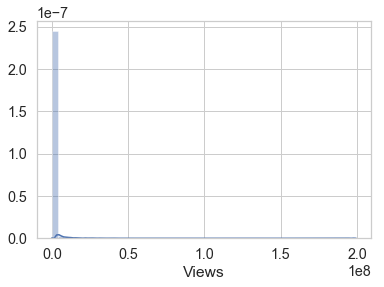

In [284]:
views = df_views_songs_train['Views']
sns.distplot(views, color="b")

**Observations**

1. We observe target variable i.e; Views is not normally distributed
2. Lets apply different transformation and check.

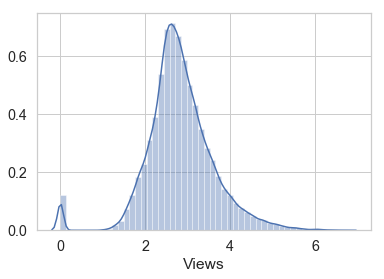

In [238]:
views_trans=df_views_songs_train['Views'].apply(lambda x : x**(1/10))
sns.distplot(views_trans, color="b")

**Observations:** Current transformation has made it little better. Lets check another assumption.

In [240]:
df_views_songs_train['Views'] = pd.DataFrame({'Views':views_trans})

In [242]:
df_views_songs_train['Views'].head()

0    1.774173
1    1.635581
2    2.329067
3    2.099371
4    1.641454
Name: Views, dtype: float64

#### b. Independant variables shouldn't be correlated

**NOTE:**

Above assumption is taken care in [Remove highly correlated columns](#section403). Moving forward.

#### c.  Independant variables and target variable should have linear relation

In [285]:
cols_to_drop = list()

# iterating through feature columns and collecting all columns 
# who have less than 0.1 correlation with target variable
for i in range(0, len(feature_cols)):
    corr_matrix = df_views_songs_sd[['Views', feature_cols[i]]].corr().abs()
    if(corr_matrix.iloc[0][1] < 0.1):
        cols_to_drop.append(feature_cols[i])

#dropping all uncorrelated columns
X.drop(cols_to_drop, axis = 1, inplace=True)
X.shape

(78458, 21)

**NOTE:**

Dropped all columns who have less than **0.1 correlation** with target variable.

##### Splitting train data in train and test data


In [91]:
from sklearn.model_selection import train_test_split

def split(X,y):
    return train_test_split(X, y, test_size=0.30, random_state=1)

In [92]:
X_train_lr, X_test_lr, y_train_lr, y_test_lr=split(X,y)
print('Train cases as below')
print('X_train shape: ',X_train_lr.shape)
print('y_train shape: ',y_train_lr.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test_lr.shape)
print('y_test shape: ',y_test_lr.shape)

Train cases as below
X_train shape:  (54920, 18)
y_train shape:  (54920, 1)

Test cases as below
X_test shape:  (23538, 18)
y_test shape:  (23538, 1)


##### Defining Linear Regression function for modelling

In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

def linear_reg(gridsearch = False):
    linreg = LinearRegression() 
    if not(gridsearch):
        parameters = {'normalize':[True,False], 'copy_X':[True, False]}
        linreg = RandomizedSearchCV(linreg,parameters, cv = 10,refit = True)                                                    
        return linreg
    else:
        parameters = {'normalize':[True,False], 'copy_X':[True, False]}
        linreg = GridSearchCV(linreg,parameters, cv = 10,refit = True)                                                    
        return linreg

 <a id=section60102></a>
### 6.1.2 Using Default Model

 <a id=section6010201></a>
#### 6.1.2.1 Building Model and Prediction

In [106]:
df_views_songs_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78458 entries, 0 to 1570012
Data columns (total 34 columns):
Comments                                                                            5780 non-null float64
Followers                                                                           5780 non-null float64
Likes                                                                               5780 non-null float64
Genre_danceedm                                                                      5780 non-null float64
Genre_electronic                                                                    5780 non-null float64
Genre_all-music                                                                     5780 non-null float64
Genre_rbsoul                                                                        5780 non-null float64
Genre_latin                                                                         5780 non-null float64
Genre_trap                               

In [107]:
df_views_songs_train[df_views_songs_train.isna()].count()

Comments                                                                            0
Followers                                                                           0
Likes                                                                               0
Genre_danceedm                                                                      0
Genre_electronic                                                                    0
Genre_all-music                                                                     0
Genre_rbsoul                                                                        0
Genre_latin                                                                         0
Genre_trap                                                                          0
Genre_rock                                                                          0
Genre_deephouse                                                                     0
Genre_pop                                             

In [105]:
df_views_songs_train[df_views_songs_train['Views'] >= np.finfo(np.float64).max]

,Comments,Followers,Likes,Genre_danceedm,Genre_electronic,Genre_all-music,Genre_rbsoul,Genre_latin,Genre_trap,Genre_rock,Genre_deephouse,Genre_pop,Genre_dubstep,Name_Mixmag,Name_Monstercat,Name_GR6 EXPLODE,Name_Hardstyle,Name_Sweet Musique,Name_officialb2s,Name_trndmsk,Name_Uptempo HC Channel,Name_Resident Advisor,Name_LEGENDA FUNK,Song_Name_! ARRIBA NUEVO LEON ! [ Norteño Quick Mix ] DROPS 2018,Song_Name_TimPaa - Crazy (Original Mix)[10k Free EP],Song_Name_CONRANK - Mad In Here [FREE DOWNLOAD],Song_Name_Turn Me On (JP Candela Remix),Song_Name_The Wrecking Ball Unchained,Song_Name_The Anjunadeep Edition 198 with Dosem,"Song_Name_OFB x UK Drill Type Beat ""Suppressed"" [Pt II] (Prod. ZCBeats x Ghosty)","Song_Name_For Hot 97 (feat. JBan$2Turn, Byou & BigBruthaChubba)",Song_Name_MOT THUA YEU NGUOI DJ PT,Song_Name_Breathe(Acoustic) - Lauv,Views


In [103]:
linreg = LinearRegression()
linreg.fit(X_train_lr,y_train_lr)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
# print the intercept and coefficients
print('Intercept:',linreg.intercept_)
print('Coefficients:',linreg.coef_)  

In [ ]:
 # make predictions on the training set
y_pred_train_lr = linreg.predict(X_train_lr) 

In [ ]:
 # make predictions on the testing set
y_pred_test_lr = linreg.predict(X_test_lr)  

 <a id=section6010202></a>
#### 6.1.2.2 Model Evaluation

#### a. RMSE


In [ ]:
from sklearn import metrics
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train_lr, y_pred_train_lr))
print('RMSE for training set is {}'.format(RMSE_train))

RMSE_test = np.sqrt( metrics.mean_squared_error(y_test_lr, y_pred_test_lr))
print('RMSE for testing set is {}'.format(RMSE_test))

#### b. MAPE


In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
mape_train_error = mean_absolute_percentage_error(y_train_lr, y_pred_train_lr)
mape_test_error = mean_absolute_percentage_error(y_test_lr, y_pred_test_lr)
print('MAPE for training set is {}'.format(mape_train_error))
print('MAPE for testing set is {}'.format(mape_test_error))

#### c. R-Squared Error

In [ ]:
from sklearn.metrics import r2_score

r_squared_train_lr = r2_score(y_train_lr,y_pred_train_lr )
print('R-Squared for training set is {}'.format(r_squared_train_lr))

In [ ]:
r_squared_test_lr = r2_score(y_test_lr,y_pred_test_lr )
print('R-Squared for testing set is {}'.format(r_squared_test_lr))

#### d. Adjusted R-Squared Error

In [ ]:
adjusted_r_squared_train_lr = 1 - (1-r_squared_train_lr)*(len(y_train_lr)-1)/(len(y_train_lr)-X_train_lr.shape[1]-1)
print('Adjusted R-Squared for training set is {}'.format(adjusted_r_squared_train_lr))

In [ ]:
adjusted_r_squared_test_lr = 1 - (1-r_squared_test_lr)*(len(y_test_lr)-1)/(len(y_test_lr)-X_test_lr.shape[1]-1)
print('Adjusted R-Squared for testing set is {}'.format(adjusted_r_squared_test_lr))

 <a id=section60103></a>
### 6.1.3 Using GridSearchCV

 <a id=section6010301></a>
#### 6.1.3.1 Building Model and Prediction

In [ ]:
linreg_gs = linear_reg(True)
linreg_gs.fit(X_train_lr,y_train_lr)

In [ ]:
linreg_gs

In [ ]:
print("best_params after cross-validation : ", linreg_gs.best_params_)   

In [ ]:
 # make predictions on the training set
y_pred_train_lr_gs = linreg_gs.predict(X_train_lr) 

In [ ]:
 # make predictions on the testing set
y_pred_test_lr_gs = linreg_gs.predict(X_test_lr)  

 <a id=section6010302></a>
#### 6.1.3.2 Model Evaluation

#### a. RMSE


In [ ]:
from sklearn import metrics
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train_lr, y_pred_train_lr_gs))
print('RMSE for training set is {}'.format(RMSE_train))
RMSE_test = np.sqrt( metrics.mean_squared_error(y_test_lr, y_pred_test_lr_gs))
print('RMSE for testing set is {}'.format(RMSE_test))

#### b. MAPE


In [ ]:
mape_train_error = mean_absolute_percentage_error(y_train_lr, y_pred_train_lr_gs)
mape_test_error = mean_absolute_percentage_error(y_test_lr, y_pred_test_lr_gs)
print('MAPE for training set is {}'.format(mape_train_error))
print('MAPE for testing set is {}'.format(mape_test_error))

#### c. R-Squared Error

In [ ]:
from sklearn.metrics import r2_score

r_squared_train_lr_gs = r2_score(y_train_lr,y_pred_train_lr_gs )
print('R-Squared for training set is {}'.format(r_squared_train_lr_gs))

In [ ]:
r_squared_test_lr_gs = r2_score(y_test_lr,y_pred_test_lr_gs )
print('R-Squared for testing set is {}'.format(r_squared_test_lr_gs))

#### d. Adjusted R-Squared Error

In [ ]:
adjusted_r_squared_train_lr_gs = 1 - (1-r_squared_train_lr_gs)*(len(y_train_lr)-1)/(len(y_train_lr)-X_train_lr.shape[1]-1)
print('Adjusted R-Squared for training set is {}'.format(adjusted_r_squared_train_lr_gs))

In [ ]:
adjusted_r_squared_test_lr_gs = 1 - (1-r_squared_test_lr_gs)*(len(y_test_lr)-1)/(len(y_test_lr)-X_test_lr.shape[1]-1)
print('Adjusted R-Squared for testing set is {}'.format(adjusted_r_squared_test_lr_gs))

 <a id=section60104></a>
### 6.1.4 Using RandomSearchCV

 <a id=section6010401></a>
#### 6.1.4.1 Building Model and Prediction

In [ ]:
linreg_rs = linear_reg(False)
linreg_rs.fit(X_train_lr,y_train_lr)

In [ ]:
linreg_rs

In [ ]:
print("best_params after cross-validation : ", linreg_rs.best_params_)   

In [ ]:
 # make predictions on the training set
y_pred_train_lr_rs = linreg_rs.predict(X_train_lr) 

In [ ]:
 # make predictions on the testing set
y_pred_test_lr_rs = linreg_rs.predict(X_test_lr)  

 <a id=section6010402></a>
#### 6.1.4.2 Model Evaluation

#### a. RMSE


In [ ]:
from sklearn import metrics
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train_lr, y_pred_train_lr_rs))
print('RMSE for training set is {}'.format(RMSE_train))

RMSE_test = np.sqrt( metrics.mean_squared_error(y_test_lr, y_pred_test_lr_rs))
print('RMSE for testing set is {}'.format(RMSE_test))

#### b. MAPE


In [ ]:
mape_train_error = mean_absolute_percentage_error(y_train_lr, y_pred_train_lr_rs)
mape_test_error = mean_absolute_percentage_error(y_test_lr, y_pred_test_lr_rs)
print('MAPE for training set is {}'.format(mape_train_error))
print('MAPE for testing set is {}'.format(mape_test_error))

#### c. R-Squared Error

In [ ]:
from sklearn.metrics import r2_score

r_squared_train_lr_rs = r2_score(y_train_lr,y_pred_train_lr_rs )
print('R-Squared for training set is {}'.format(r_squared_train_lr_rs))

In [ ]:
r_squared_test_lr_rs = r2_score(y_test_lr,y_pred_test_lr_rs )
print('R-Squared for testing set is {}'.format(r_squared_test_lr_rs))

#### d. Adjusted R-Squared Error

In [ ]:
adjusted_r_squared_train_lr_rs = 1 - (1-r_squared_train_lr_rs)*(len(y_train_lr)-1)/(len(y_train_lr)-X_train_lr.shape[1]-1)
print('Adjusted R-Squared for training set is {}'.format(adjusted_r_squared_train_lr_rs))

In [ ]:
#adjusted_r_squared_test_lr_rs = 1 - (1-r_squared_test_lr_rs)*(len(y_test_lr)-1)/(len(y_test_lr)-X_test_lr.shape[1]-1)
#print('Adjusted R-Squared for testing set is {}'.format(adjusted_r_squared_test_lr_rs))

In [ ]:
print(df_views_songs_train.shape)
print(df_views_songs_test.shape)